# Example of fitting the cross talk experimental results

There are two types of fitters:
* The one for fitting HD data
* The one for fitting P data (by default it uses the results of HD fitting, so this fit shoud be performed second)

Let's consider the fitting procedure step by step

In [1]:
from fitting_HD import FitterHD
from fitting_P import FitterX
%matplotlib inline

First one should set the config file, containing the sample information, fitting method etc.

In [2]:
## 1 . Setting config files
config_HD = {
    'h2o_add': 10,      # ul per 100 ul sample
    'conc_tempol': 60,  # mM
    
    # Set is_dt True if TEMPOL is deuterated
    'is_dt': False,
    
    # Set if only H11 and H01 data should be fitted
    # (as if one wouldn't have D data)
    'only_H': False,
    
    # Set True to account for the errors
    'with_errors': True,

    # SET FIT METHOD
    # 'leastsq' for a local fit
    # 'differential_evolution' for a global fit
    'fit_method': 'differential_evolution'
}

Then one has to create the instance of the fitter class initialized by this config dictionary

In [3]:
fitter_HD = FitterHD(config_HD)

The main method than is `.fit`, with all options explicitly stated in the next line. `sampling_rate` option corresponds to the sampling rate for protons.
Any generated files are stored in the `fit_results` folder.

c:\Users\Bogdan\.conda\envs\cross_talk_fit\lib\site-packages\lmfit\minimizer.py:854: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))
c:\Users\Bogdan\.conda\envs\cross_talk_fit\lib\site-packages\lmfit\minimizer.py:847: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])


[[Fit Statistics]]
    # fitting method   = differential_evolution
    # function evals   = 2615
    # data points      = 1078
    # variables        = 4
    chi-square         = 4121.34481
    reduced chi-square = 3.83737878
    Akaike info crit   = 1453.67567
    Bayesian info crit = 1473.60712
##  Warning: uncertainties could not be estimated:
[[Variables]]
    b1_01:   0 (fixed)
    b2_01:   16.71058 (fixed)
    bnz_01:  16.56104 (fixed)
    tau_1:   5.88299589 +/- 0.44840223 (7.62%) (init = 12)
    tau_2:   246.168559 +/- 2.74408019 (1.11%) (init = 380)
    tau_nz:  4.84969913 +/-        nan (nan%) (init = 7)
    c_1:     6.417657e+39 (fixed)
    c_2:     2.534961e+39 (fixed)
    c_nz:    8.5676e+38 +/- 4.3564e+36 (0.51%) (init = 7.719875e+36)
    b1_10:   15.94551 (fixed)
    b2_10:   0 (fixed)
    bnz_10:  16.56104 (fixed)
    b1_00:   0 (fixed)
    b2_00:   0 (fixed)
    bnz_00:  16.56104 (fixed)
    b1_11:   16.69138 (fixed)
    b2_11:   16.89668 (fixed)
    bnz_11:  16.56104 

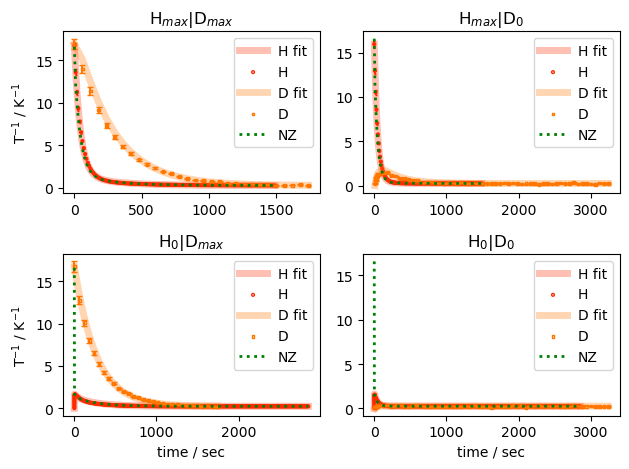

In [4]:
fitter_HD.make_fit(show_plot=True,
            save_plot=False,
            print_report=True,
            save_report=False,
            sample_rate=1)

To see the proper corralation between parameters, one then can use `emcee` method. `steps` here is set to be 200, but it is only done for expedite the calculation. The number of `1000` and more is required.

--------------------------------------------
accounting for statistics


100%|██████████| 200/200 [09:12<00:00,  2.76s/it]


The chain is shorter than 50 times the integrated autocorrelation time for 4 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 4;
tau: [13.95948366 14.741974   13.9830729  13.62233982]
median of posterior probability distribution
--------------------------------------------
[[Variables]]
    b1_01:   0 (fixed)
    b2_01:   16.71058 (fixed)
    bnz_01:  16.56104 (fixed)
    tau_1:   5.82223831 +/- 0.08826400 (1.52%) (init = 5.882996)
    tau_2:   246.762879 +/- 1.01747510 (0.41%) (init = 246.1686)
    tau_nz:  4.84512934 +/- 0.04059025 (0.84%) (init = 4.849699)
    c_1:     6.417657e+39 (fixed)
    c_2:     2.534961e+39 (fixed)
    c_nz:    8.5772e+38 +/- 8.3760e+36 (0.98%) (init = 8.567574e+38)
    b1_10:   15.94551 (fixed)
    b2_10:   0 (fixed)
    bnz_10:  16.56104 (fixed)
    b1_00:   0 (fixed)
    b2_00:   0 (fixed)
    bnz_00:  16.56104 (fixed)
    b1_11:   16.69138 (fixed)
    b2_11:   16.89668 (fixed)
    bnz_11:  16.56104 (fixed)
[[Correlations]] (unr

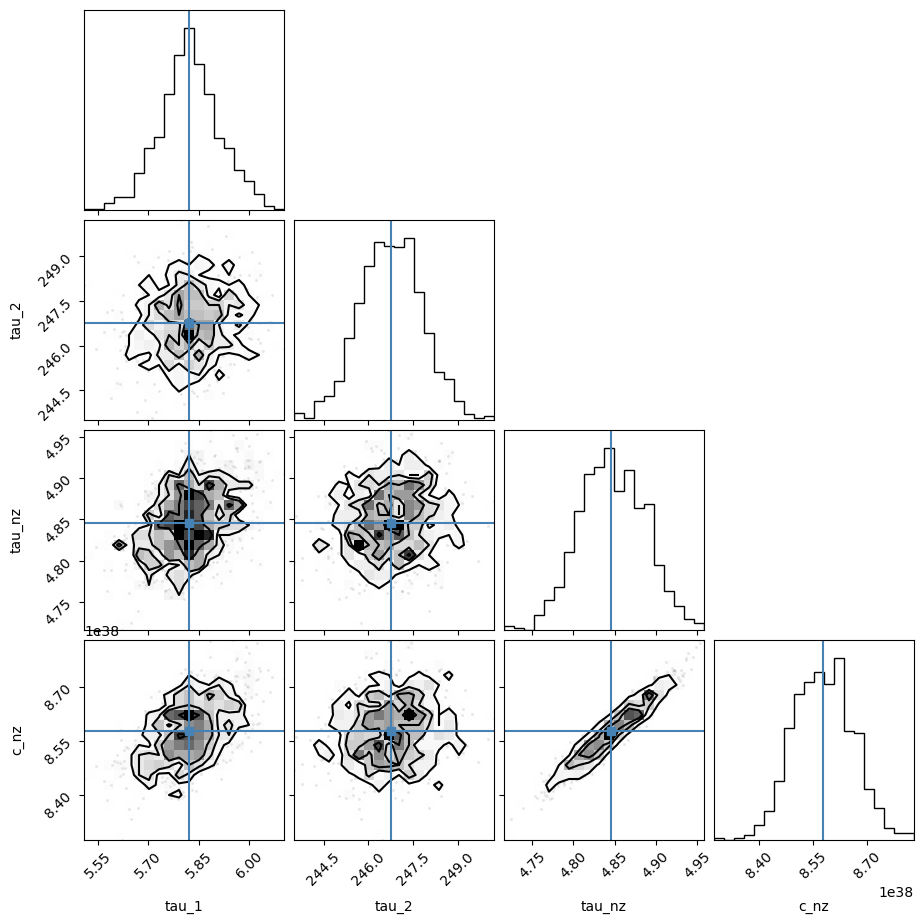

In [5]:
fitter_HD.emcee(steps=200,
            progress=True,
            plot=True,
            save_plot=False,
            report=True,
            save_report=False)

Finally, the obtained parameters can be used to fit data of the X nuclei, in my case this is P data.
Again, let's create the instance of the X data fitter.


In [7]:
config_P = {
        'h2o_add': 10,      # ul per 100 ul sample
        'conc_tempol': 60,  # mM
        'k2hpo4': 0.5,      # M
        
        # Set True to account for the errors
        'with_errors': True,
        
        # SET FIT METHOD
        # 'leastsq' for a local fit
        # 'differential_evolution' for a global fit
        'fit_method': 'differential_evolution'
    }

In [9]:
fitter_P = FitterX(config_P)

Again, let's use the `make_fit` method.

Here the `load_params` options correspond to the fact that we will upload parameters from the HD data.

[[Fit Statistics]]
    # fitting method   = differential_evolution
    # function evals   = 252
    # data points      = 1099
    # variables        = 1
    chi-square         = 13142.5730
    reduced chi-square = 11.9695565
    Akaike info crit   = 2729.12029
    Bayesian info crit = 2734.12245
[[Variables]]
    tau_1:   5.847224 (fixed)
    tau_2:   246.8151 (fixed)
    tau_nz:  4.847787 (fixed)
    c_1:     6.417657e+39 (fixed)
    c_2:     2.534961e+39 (fixed)
    c_nz:    8.594553e+38 (fixed)
    b1_0:    14.70242 (fixed)
    b2_0:    14.70242 (fixed)
    b3_0:    0 (fixed)
    bnz_0:   14.70242 (fixed)
    b1_1:    14.70242 (fixed)
    b2_1:    14.70242 (fixed)
    b3_1:    14.70242 (fixed)
    bnz_1:   14.70242 (fixed)
    tau_3:   1123.81313 +/- 8.78615565 (0.78%) (init = 1000)
    c_3:     3.970279e+37 (fixed)


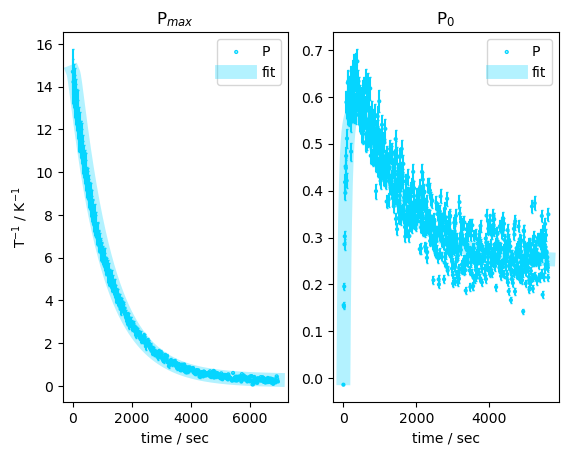

In [10]:
fitter_P.make_fit(load_params=True,
                show_plot=True,
                save_plot=True,
                print_report=True,
                save_report=True)